In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [8]:
print(cities)

['skibbereen', 'butaritari', 'komsomolskiy', 'constitucion', 'chuy', 'burica', 'poum', 'hasaki', 'hilo', 'tuktoyaktuk', 'guerrero negro', 'vaini', 'stavern', 'bethel', 'vaitupu', 'nouadhibou', 'rikitea', 'barrow', 'encruzilhada', 'ushuaia', 'tasiilaq', 'norman wells', 'asau', 'busselton', 'ucluelet', 'yakima', 'tumannyy', 'hobart', 'kloulklubed', 'puerto el triunfo', 'nelson bay', 'albany', 'lolua', 'tondano', 'kangaatsiaq', 'alekseyevsk', 'hermanus', 'mar del plata', 'ponta do sol', 'port alfred', 'bundaberg', 'illoqqortoormiut', 'luderitz', 'nikolskoye', 'huilong', 'matagami', 'samusu', 'torbay', 'taolanaro', 'valparaiso', 'emerald', 'vila velha', 'new norfolk', 'belushya guba', 'deer lake', 'souillac', 'barentsburg', 'korla', 'senica', 'port augusta', 'khudumelapye', 'atuona', 'louisbourg', 'yellowknife', 'saldanha', 'bluff', 'lebu', 'santona', 'flinders', 'castro', 'samarai', 'billings', 'qaanaaq', 'vardo', 'buchanan', 'kapaa', 'jamestown', 'codrington', 'khonuu', 'tuatapere', 'hel

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

# Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

# Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

# Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

# Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | skibbereen
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | komsomolskiy
Processing Record 4 of Set 1 | constitucion
Processing Record 5 of Set 1 | chuy
Processing Record 6 of Set 1 | burica
City not found. Skipping...
Processing Record 7 of Set 1 | poum
Processing Record 8 of Set 1 | hasaki
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | tuktoyaktuk
Processing Record 11 of Set 1 | guerrero negro
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | stavern
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 16 of Set 1 | nouadhibou
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | barrow
Processing Record 19 of Set 1 | encruzilhada
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | tasiilaq
Processing Record 22 of Set 1 | 

In [11]:
len(city_data)

559

In [12]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Skibbereen,51.5500,-9.2667,49.10,89,100,6.60,IE,2022-02-28 04:55:46
1,Butaritari,3.0707,172.7902,81.95,79,100,19.08,KI,2022-02-28 04:55:46
2,Komsomolskiy,40.4272,71.7189,51.62,28,100,2.89,UZ,2022-02-28 04:55:46
3,Constitucion,-35.3333,-72.4167,54.39,78,0,12.01,CL,2022-02-28 04:51:42
4,Chuy,-33.6971,-53.4616,70.99,94,100,5.06,UY,2022-02-28 04:51:10


In [13]:
new_column_order = ["City","Country","Date", "Lat","Lng", "Max Temp","Humidity","Cloudiness", "Wind Speed"]

In [14]:
# Changing column order DataFrame.
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Skibbereen,IE,2022-02-28 04:55:46,51.5500,-9.2667,49.10,89,100,6.60
1,Butaritari,KI,2022-02-28 04:55:46,3.0707,172.7902,81.95,79,100,19.08
2,Komsomolskiy,UZ,2022-02-28 04:55:46,40.4272,71.7189,51.62,28,100,2.89
3,Constitucion,CL,2022-02-28 04:51:42,-35.3333,-72.4167,54.39,78,0,12.01
4,Chuy,UY,2022-02-28 04:51:10,-33.6971,-53.4616,70.99,94,100,5.06


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

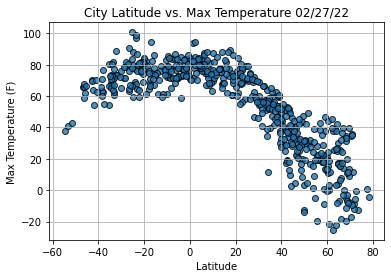

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

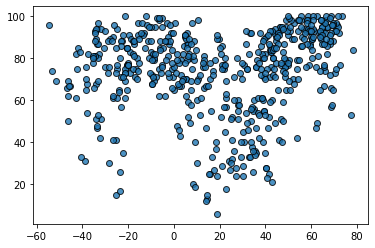

In [24]:
# Scatter plot carpares latitude vs humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Show plot
plt.show

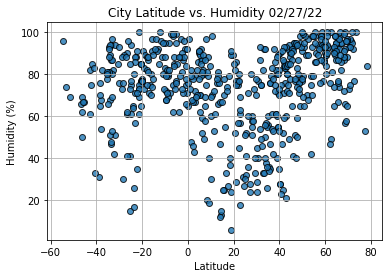

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

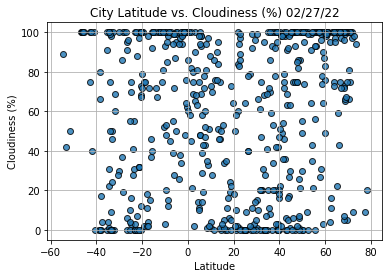

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

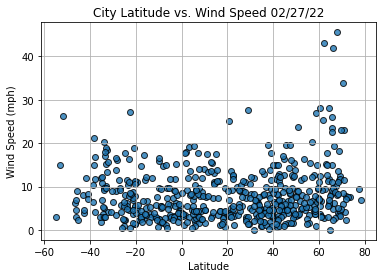

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()